## Build a machine learning model to predict user will click the ad or not based on his experience and estimated salary for a given dataset

### Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import sys
sys.path.append('/home/admin1/PycharmProjects/Machine Learning using libraries/')
import os
os.chdir('/home/admin1/PycharmProjects/Machine Learning using libraries/Classification/Datasets & pickled objects/')
from ipynb.fs.full.ml_library import *

# reading dataset from file & storing it as pandas dataframe
social_network_data = pd.read_csv('Social_Network_Ads.csv')
social_network_data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [2]:
social_network_data.info()       # observing datatypes of different columns & checking null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [3]:
# column of user id & Gender are not required for prediction so dropping it
features = ['Age', 'EstimatedSalary']
label = 'Purchased'

#### Separating out feature colums & label column 

In [4]:
x_values = social_network_data.loc[:,features].values
y_values = social_network_data.loc[:,label].values

In [5]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
x_values = sc_x.fit_transform(x_values)

#### Splitting dataset into train set & test set

In [6]:
from sklearn.model_selection import train_test_split
train_x_values, test_x_values, train_y_values, test_y_values = train_test_split(x_values, y_values, train_size=0.8, random_state=0)

### Building Logistic Regression model

In [7]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state=0)
classifier.fit(train_x_values, train_y_values)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#### Storing essential objects into pickle file

In [8]:
import joblib
file = open('DataProcessingAdClick.pkl', 'wb')
joblib.dump(features, file)
joblib.dump(label, file)
joblib.dump(sc_x, file)
file.close()

file = open('LogisticModelAdClick.pkl', 'wb')
joblib.dump(classifier, file)
file.close()

#### Storing predictions for test set

In [9]:
test_prediction = classifier.predict(test_x_values)

### Evaluating model against test set 

In [10]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
print(f'Confusion matrix:\n {confusion_matrix(test_y_values, test_prediction)}')
print(f'Accuracy score: {accuracy_score(test_y_values, test_prediction)}')
print(f'Precision score: {precision_score(test_y_values, test_prediction)}')
print(f'Recall score: {recall_score(test_y_values, test_prediction)}')
print(f'F1 score: {f1_score(test_y_values, test_prediction)}')

Confusion matrix:
 [[57  1]
 [ 5 17]]
Accuracy score: 0.925
Precision score: 0.9444444444444444
Recall score: 0.7727272727272727
F1 score: 0.85


### Plotting colormap for  classification

#### 1 (blue) represents user purchased & 0 (red) represents user not purchased  

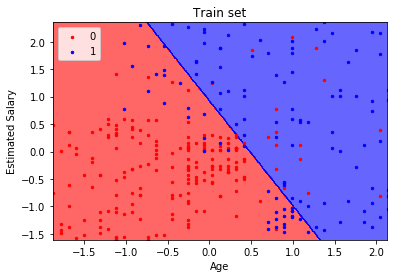

In [11]:
plot_colormap(train_x_values, train_y_values, classifier,'Train set')

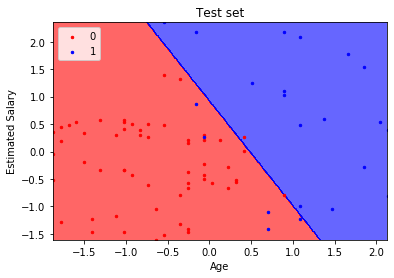

In [12]:
plot_colormap(test_x_values, test_y_values, classifier,'Test set')

### Plotting CAP (Cumulative Accuracy Profile) curve 

Accuracy using CAP curve: 0.7727272727272727


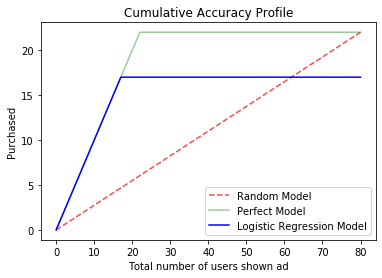

In [13]:
prob= 0.5  # in sklearn 0.5 is default proabability threshold for classification
plot_cap_curve(test_y_values, test_x_values, classifier, prob, 'Total number of users shown ad', 'Purchased', 'Logistic Regression Model')

### Adjusting precision & recall according to goal

#### If we want precision in prediction of accurate potential users those will purchase (high precision score)

In [14]:
test_prob = classifier.predict_proba(test_x_values)[:,1]
prob = 0.6
test_prediction = np.where(test_prob > prob, 1, 0)

In [15]:
print(f'Confusion matrix:\n {confusion_matrix(test_y_values, test_prediction)}')
print(f'Recall score: {recall_score(test_y_values, test_prediction)}')
print(f'Precision score: {precision_score(test_y_values, test_prediction)}')

Confusion matrix:
 [[58  0]
 [ 6 16]]
Recall score: 0.7272727272727273
Precision score: 1.0


#### Plotting CAP curve for high precision

Accuracy using CAP curve: 0.7272727272727273


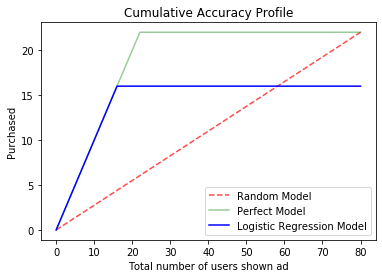

In [16]:
plot_cap_curve(test_y_values, test_x_values, classifier, prob, 'Total number of users shown ad', 'Purchased', 'Logistic Regression Model')

#### If we don't want to miss out any potential user who will purchase (high recall score)

In [17]:
test_prob = classifier.predict_proba(test_x_values)[:,1]
prob = 0.2
test_prediction = np.where(test_prob > prob, 1, 0)

In [18]:
print(f'Confusion matrix:\n {confusion_matrix(test_y_values, test_prediction)}')
print(f'Recall score: {recall_score(test_y_values, test_prediction)}')
print(f'Precision score: {precision_score(test_y_values, test_prediction)}')

Confusion matrix:
 [[43 15]
 [ 0 22]]
Recall score: 1.0
Precision score: 0.5945945945945946


#### Plotting CAP curve for high recall

Accuracy using CAP curve: 1.0


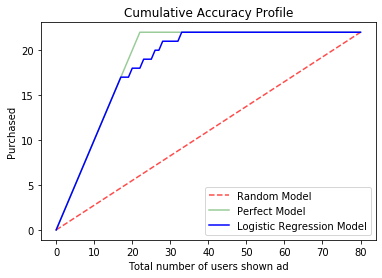

In [19]:
plot_cap_curve(test_y_values, test_x_values, classifier, prob, 'Total number of users shown ad', 'Purchased', 'Logistic Regression Model')